## This is project is to predict the wellhead pressure and flow pattern within the well

![shale well](img/shallwellimg.jpg)

### Import modules

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

%matplotlib inline

### Read raw data

In [2]:
df=pd.read_csv('simple_well1.csv')

In [3]:
df.head()

,Date,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1/1/2020,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,4,2126.376735,212.370290
1,1/2/2020,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,4,2177.457559,208.752810
2,1/3/2020,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,4,2168.102001,206.531840
3,1/4/2020,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,4,2183.207951,203.401306
4,1/5/2020,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,4,2220.778037,199.208880


In [4]:
df.drop(columns='Date', inplace=True)

In [5]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,4,2126.376735,212.370290
1,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,4,2177.457559,208.752810
2,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,4,2168.102001,206.531840
3,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,4,2183.207951,203.401306
4,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,4,2220.778037,199.208880


In [6]:
df['FlowPatternGasLiquid6'].nunique()

2

zero hot encoding

In [7]:
df2=pd.get_dummies(df['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [8]:
df2.head()

,FlowPattern_3,FlowPattern_4
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [9]:
df=pd.concat([df,df2],axis=1)

In [10]:
df.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [11]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,2.0,480.0,4500.0,5600.0,0.079350,0.829993,0.845727,409800.7890,0.510384,2.641022,0.013319,0.273293,2126.376735,212.370290,0,1
1,2.0,480.0,3450.0,5500.0,0.079880,0.669710,0.817304,334632.3328,0.507737,2.124772,0.012765,0.275990,2177.457559,208.752810,0,1
2,2.0,480.0,3000.0,5400.0,0.081080,0.598358,0.797930,303566.9168,0.517678,1.900507,0.012747,0.277711,2168.102001,206.531840,0,1
3,2.0,479.0,2500.0,5300.0,0.082113,0.520704,0.774212,268085.3347,0.522150,1.652199,0.012434,0.280040,2183.207951,203.401306,0,1
4,2.0,479.0,2000.0,5200.0,0.082792,0.444817,0.747499,231149.3853,0.519421,1.406630,0.011781,0.283581,2220.778037,199.208880,0,1


In [12]:
y_pre=df['FINAPRESS']
X_pre=df.drop(columns=['FINAPRESS','FINATEMP'], axis=1)

In [13]:
y_hol=df['HoldupFractionLiquid6']
X_hol=df.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)

In [14]:
y_pat=df[['FlowPattern_3','FlowPattern_4']]
X_pat=df.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)

### Plot the data

In [15]:
def four_y_plot(paraa, labela, parab, labelb, parac, labelc, parad, labeld, labelx, title):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    
    fig, host = plt.subplots(figsize=(10, 8))
    fig.subplots_adjust(right=1)
    
    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.1))
    par3.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)
    par3.spines["right"].set_visible(True)
    
    p1, = host.plot(paraa, "b-", label=labela)
    p2, = par1.plot(parab, "r-", label=labela)
    p3, = par2.plot(parac, "g-", label=labelc)
    p4, = par3.plot(parad, "black", label=labeld)
    
    # host.set_xlim(0, 250)
    # host.set_ylim(0, 2.2)
    # par1.set_ylim(0, 500)
    # par2.set_ylim(1, 5000)
    # par3.set_ylim(1, 6000)
    
    host.set_xlabel(labelx, fontsize=14)
    host.set_ylabel(labela, fontsize=14)
    par1.set_ylabel(labelb, fontsize=14)
    par2.set_ylabel(labelc, fontsize=14)
    par3.set_ylabel(labeld, fontsize=14)
    
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    par3.yaxis.label.set_color(p4.get_color())
    
    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), labelsize=12)
    par1.tick_params(axis='y', colors=p2.get_color(), labelsize=12)
    par2.tick_params(axis='y', colors=p3.get_color(), labelsize=12)
    par3.tick_params(axis='y', colors=p4.get_color(), labelsize=12)
    host.tick_params(axis='x', labelsize=14)
    
    lines = [p1, p2, p3, p4]
    
    host.legend(lines, [l.get_label() for l in lines], fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.show()

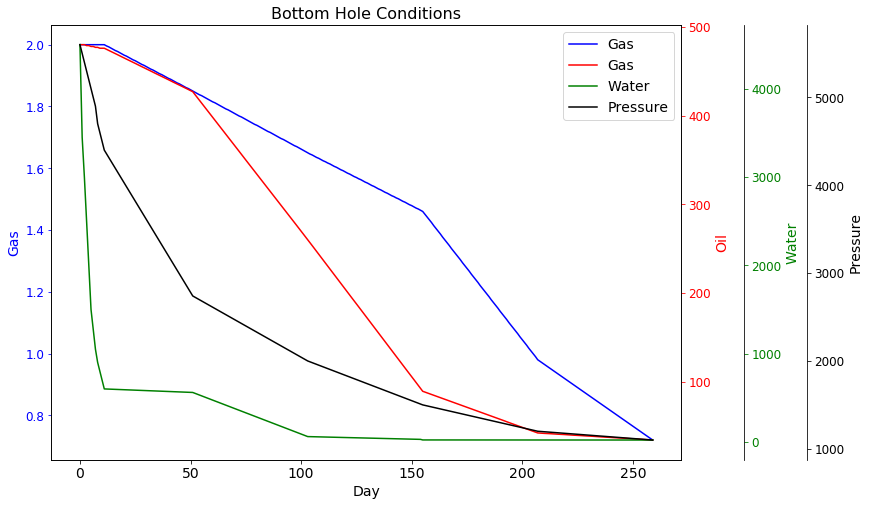

In [16]:
four_y_plot(df['Gas Flow_MMSCFD'], "Gas",
                   df['Oil_bpd'], "Oil", 
                   df['Water_bpd'],"Water",
                   df['FWHP_psig'], "Pressure",
                   "Day",
                   "Bottom Hole Conditions")

Prepare train and test data

In [134]:
X_pre= preprocessing.StandardScaler().fit(X_pre).transform(X_pre)
X_pre[0:5]
X_hol= preprocessing.StandardScaler().fit(X_hol).transform(X_hol)
X_hol[0:5]

array([[ 1.35424511,  1.60939141,  8.72827458,  3.32943236, -2.81659682,
         7.01185356,  6.91662268, -2.19543384,  6.943033  , -0.83494708,
        -1.29424203,  2.39119333, -2.66926956,  2.66926956],
       [ 1.35424511,  1.60939141,  6.57031325,  3.2343483 , -2.78066104,
         5.49894161,  5.13066463, -2.20145108,  5.41773605, -0.95416793,
        -1.28011973,  2.4812346 , -2.66926956,  2.66926956],
       [ 1.35424511,  1.60939141,  5.64547268,  3.13926424, -2.69928834,
         4.82545573,  4.39256873, -2.17885878,  4.75513176, -0.95797081,
        -1.27110885,  2.46474335, -2.66926956,  2.66926956],
       [ 1.35424511,  1.60331881,  4.61787205,  3.04418018, -2.62927343,
         4.09248449,  3.54954734, -2.16869478,  4.02148975, -1.02534153,
        -1.25891402,  2.49137094, -2.66926956,  2.66926956],
       [ 1.35424511,  1.60331881,  3.59027141,  2.94909612, -2.58320837,
         3.37618506,  2.67197104, -2.17489826,  3.29593777, -1.16599831,
        -1.24037329,  2.55

In [135]:
X_train0=X_pre[0:182]
y_train0=y_pre[0:182]
X_test0=X_pre[182:]
y_test0=y_pre[182:]
# hold up data
X_hol_train0=X_hol[0:182]
y_hol_train0=y_hol[0:182]
X_hol_test0=X_hol[182:]
y_hol_test0=y_hol[182:]

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_pre[0:182],y_pre[0:182], test_size=0.05,random_state=21)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test.shape[0]

Train set: (172, 14) (172,)
Test set: (10, 14) (10,)


10

### *SVM*

In [21]:
from sklearn import svm
from sklearn import metrics
from sklearn import model_selection



In [133]:

svr_rbf = svm.SVR(kernel='rbf', C=2000, gamma=0.005, epsilon=.1)
svr_lin = svm.SVR(kernel='linear', C=32, gamma=0.1, epsilon=0.6)
svr_poly = svm.SVR(kernel='poly',gamma=0.4, degree=4, epsilon=.2,
               coef0=0.78)

clf=svr_lin.fit(X_train, y_train)
print(clf.score(X_test1,y_test1))
y_hat=svr_lin.predict(X_test1)

# print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))

0.92500111016333


In [144]:
def cross_valuations(svr_, Xdata, ydata, nsplit, s1, l1, s2, l2, s3, l3):
    
    kfold = model_selection.KFold(n_splits=nsplit, random_state=21, shuffle=True)
    
    scores = [s1, s2, s3]
    labels = [l1, l2, l3]
    
    for ix, score in enumerate(scores):
        results = model_selection.cross_val_score(svr_, Xdata, ydata, cv=kfold, scoring=scores[ix])
        print("SVR", svr_.kernel,labels[ix],format(results.mean(),'.4f'), format(results.std(),'.4f'))
    print('\n')   
    
   

Evaluate different algorithms

In [145]:
svrs = [svr_rbf, svr_lin, svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_train0,
                 y_train0,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -11.3673 3.1034
SVR rbf RMSE: -16.0975 4.3949
SVR rbf R^2: 0.9988 0.0009


SVR linear MAE: -16.8867 3.3046
SVR linear RMSE: -24.9808 6.6186
SVR linear R^2: 0.9974 0.0016


SVR poly MAE: -16.4488 24.3475
SVR poly RMSE: -56.2328 107.6922
SVR poly R^2: 0.9468 0.1285




In [25]:
def three_svr_plot(svr1, label1, svr2, label2, svr3, label3, trainx, trainy, testx, testy, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    svrs = [svr1, svr2, svr3]
    kernel_label = [label1, label2, label3]
    model_color = ['b', 'c', 'g']
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 12), sharey=True)
    for ix, svr in enumerate(svrs):
        y_hat=svr.fit(trainx, trainy).predict(testx)
        
        MAE=format(metrics.mean_absolute_error(testy, y_hat),'.2f')
        MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
        R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
        axes[ix].plot(y_hat, color=model_color[ix], lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(kernel_label[ix], MAE, R2))
        axes[ix].plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
        axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                        ncol=1, fancybox=False, shadow=False, fontsize=14)
    fig.text(0.5, 0.04, labelx, ha='center', va='center', fontsize=12)
    fig.text(0.06, 0.5, labely, ha='center', va='center', rotation='vertical', fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

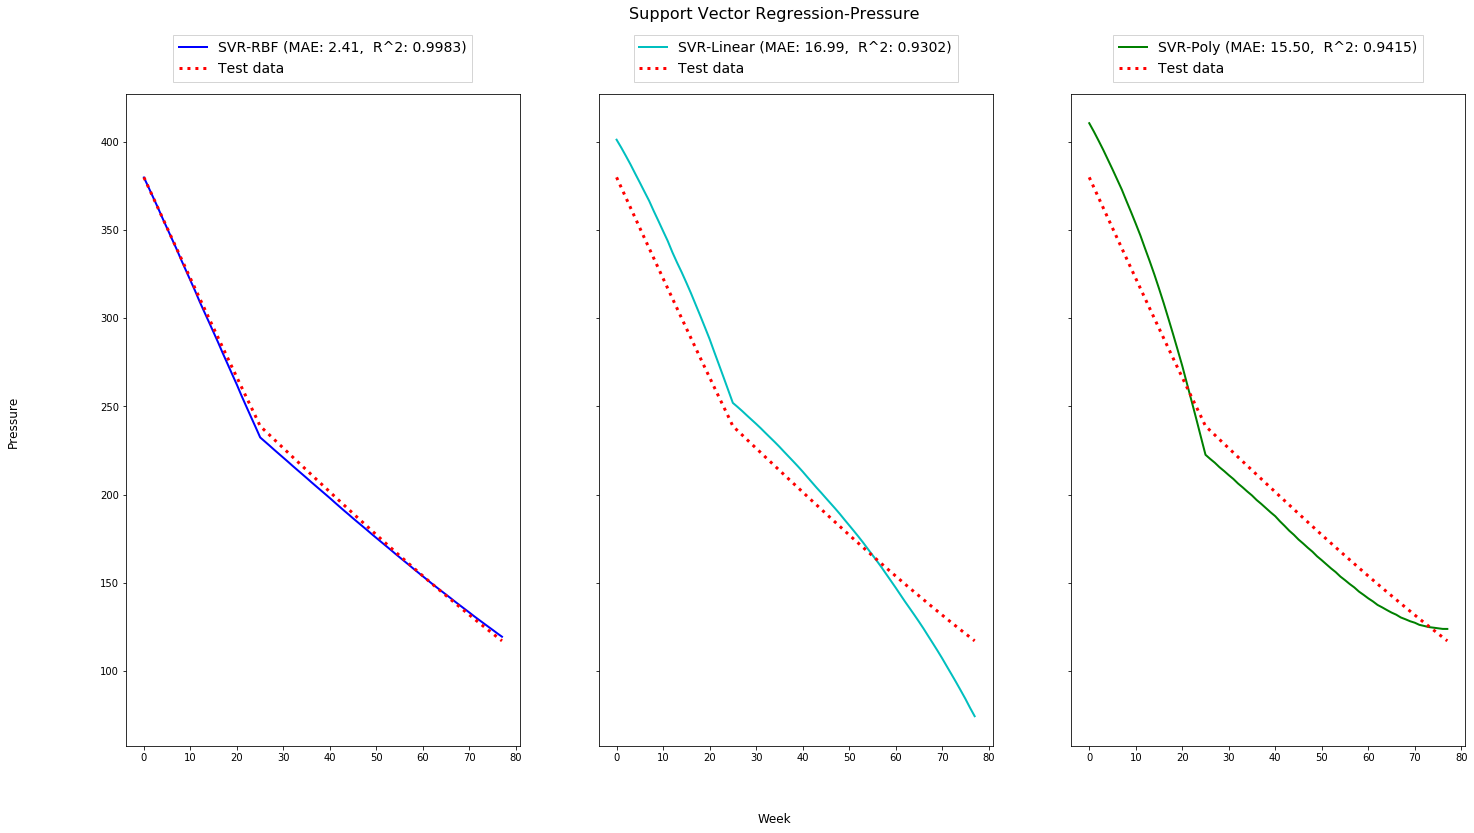

In [122]:
three_svr_plot(svr_rbf, "SVR-RBF",
               svr_lin, "SVR-Linear",
               svr_poly, "SVR-Poly",
               X_train0,
               y_train0,
               X_test0,
               y_test0,
               "Week",
               "Pressure",
               "Support Vector Regression-Pressure")

In [281]:
hol_svr_rbf = svm.SVR(kernel='rbf', C=0.5, gamma=0.0045, epsilon=0.007)
hol_svr_lin = svm.SVR(kernel='linear', C=0.1, gamma=0.001, epsilon=0.001)
hol_svr_poly = svm.SVR(kernel='poly',gamma=0.01, degree=3, epsilon=.01,
               coef0=0.1)

svrs = [hol_svr_rbf, hol_svr_lin, hol_svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_hol_train0,
                 y_hol_train0,
                 10,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -0.0055 0.0008
SVR rbf RMSE: -0.0071 0.0022
SVR rbf R^2: 0.9959 0.0017


SVR linear MAE: -0.0028 0.0008
SVR linear RMSE: -0.0061 0.0026
SVR linear R^2: 0.9968 0.0019


SVR poly MAE: -0.0074 0.0018
SVR poly RMSE: -0.0087 0.0032
SVR poly R^2: 0.9934 0.0038




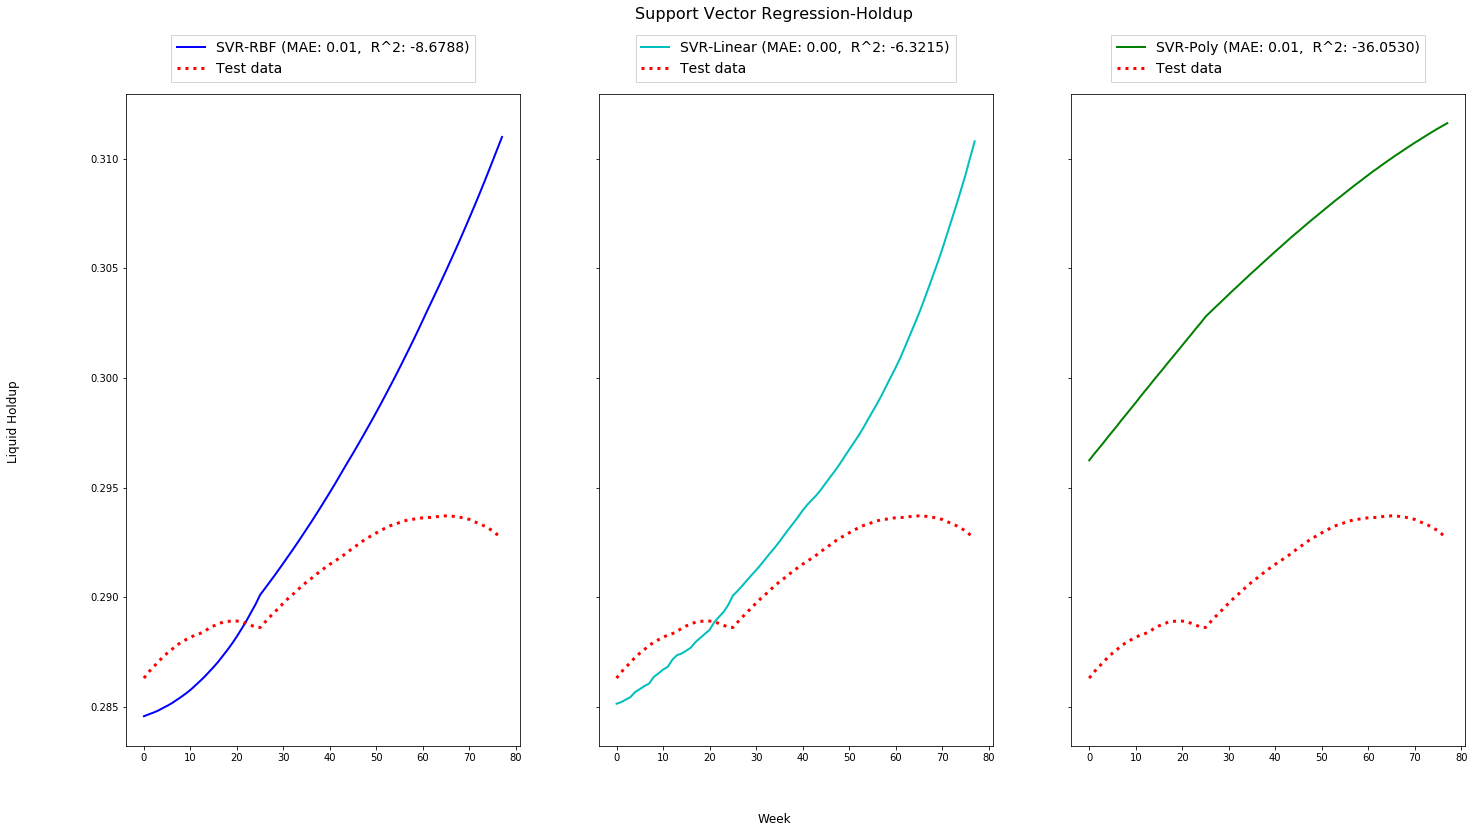

In [282]:
three_svr_plot(hol_svr_rbf, "SVR-RBF",
               hol_svr_lin, "SVR-Linear",
               hol_svr_poly, "SVR-Poly",
               X_hol_train0,
               y_hol_train0,
               X_hol_test0,
               y_hol_test0,
               "Week",
               "Liquid Holdup",
               "Support Vector Regression-Holdup")